In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#read the data
train = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Inputs/train.csv')
test  = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Inputs/test.csv').drop('id',axis=1)

print(train.head(5))
print(test.head(5))
train.dtypes

  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
  application_date  segment
0       2019-07-06        1
1       2019-07-07        1
2       2019-07-08        1
3       2019-07-09        1
4       2019-07-10        1


application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [25]:
train['application_date'] = pd.to_datetime(train['application_date'])
test['application_date'] = pd.to_datetime(test['application_date'])

In [26]:
train_1=train[train['segment']==1]
train_2=train[train['segment']==2]
print(train_1.shape)
print(train_2.shape)
print(train_1.head())

(66898, 6)
(13504, 6)
  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0


In [27]:
train_1=train_1.groupby(['application_date'])['case_count'].sum().reset_index()
train_2=train_2.groupby(['application_date'])['case_count'].sum().reset_index()
train_2.set_index('application_date',inplace=True)
train_1.set_index('application_date',inplace=True)
train_1.head()

,case_count
application_date,
2017-04-01,299.0
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0
2017-04-07,1341.0


In [39]:
train_model = train_1.loc[:'2019-03-31']
#val_model = train_1.loc['2019-01-01':'2019-03-31']
test_model = train_1.loc['2019-04-01':]

print(train_model.shape)
#print(val_model.shape)
print(test_model.shape)

(710, 1)
(96, 1)


In [45]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train_model, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=12371.357, BIC=12393.960, Fit time=28.198 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=13058.856, BIC=13067.897, Fit time=0.387 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 30); AIC=12767.505, BIC=12785.588, Fit time=3.626 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=12363.463, BIC=12381.545, Fit time=26.536 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=13057.226, BIC=13061.747, Fit time=0.603 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 30); AIC=12689.725, BIC=12707.808, Fit time=10.564 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 30); AIC=12364.754, BIC=12391.877, Fit time=45.583 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 30); setting

In [46]:
stepwise_model.fit(train_model)
future_forecast = stepwise_model.predict(n_periods=96)

In [47]:
future_forecast

array([2882.30409994, 2427.73741063, 3091.93718652, 3726.34836495,
       2832.26319918, 2884.76716832, 3008.19087085, 2847.31207439,
       2997.97459301, 3305.18864126, 3381.47837093, 3192.91259341,
       3353.72286342, 3362.17973783, 3036.4996296 , 3002.17127154,
       3222.85202095, 3130.46082664, 2995.97160018, 2687.33640607,
       3060.11837288, 2884.38896777, 2786.55553628, 3087.43231267,
       3827.0777003 , 3166.76740309, 3523.02353005, 3775.46349427,
       3731.1360773 , 2563.76721715, 2914.50286305, 2418.3927162 ,
       2836.1258577 , 3744.88496304, 2755.0929793 , 2803.49879619,
       2904.58834907, 2845.56285492, 3170.70275473, 3124.69104016,
       3296.57739155, 3105.25213718, 3313.34294236, 3292.09500893,
       3075.22343876, 3096.88839423, 3026.40956542, 2991.40140193,
       2835.06484847, 2814.10349189, 3008.54985633, 2843.24544196,
       2869.60086983, 2897.57641435, 3781.29879893, 3064.76213911,
       3471.27090396, 3741.76765599, 3780.39443701, 2209.92190

In [48]:
s=pd.DataFrame({'case_count':future_forecast})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/Timeseries_output_seg1_v0.2_saved.csv',index=False)
s.head()

,case_count
0,2882.304100
1,2427.737411
2,3091.937187
3,3726.348365
4,2832.263199


In [44]:
test_model.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/timeseries_testing_dummyoutput',index=False)
test_model.head()

,case_count
application_date,
2019-04-01,772.0
2019-04-02,3164.0
2019-04-03,3880.0
2019-04-04,3742.0
2019-04-05,4424.0


In [11]:
import itertools
import operator


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [19]:
results

NameError: name 'results' is not defined

In [53]:
train=combo[combo['flag']=='train']
test=combo[combo['flag']=='test']

#list=(['segment','branch_id','dayofweek'])
      
print(list)

train.fillna('no_data',inplace=True)
train.segment=train.segment.astype(np.object)

print(train.describe())
print(test.describe())
train.head()

<class 'list'>
         case_count          Year         Month           Day          days
count  80402.000000  80402.000000  80402.000000  80402.000000  80402.000000
mean     185.481841   2017.910512      6.380836     15.846347    509.984565
std      749.602925      0.739391      3.294341      8.765490    237.543362
min        0.000000   2017.000000      1.000000      1.000000     90.000000
25%        0.000000   2017.000000      4.000000      8.000000    306.000000
50%       18.000000   2018.000000      6.000000     16.000000    512.000000
75%       60.000000   2018.000000      9.000000     23.000000    715.000000
max    13787.000000   2019.000000     12.000000     31.000000    933.000000
          segment  branch_id  case_count    Year       Month         Day  \
count  180.000000        0.0         0.0   180.0  180.000000  180.000000   
mean     1.516667        NaN         NaN  2019.0    8.411111   16.238889   
std      0.501116        NaN         NaN     0.0    0.944191    8.725717 

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,application_date,segment,branch_id,state,zone,case_count,Year,Month,Day,dayofweek,flag,anchor,days
0,2017-04-01,1,1,WEST BENGAL,EAST,40.0,2017,4,1,Saturday,train,2017-01-01,90
1,2017-04-03,1,1,WEST BENGAL,EAST,5.0,2017,4,3,Monday,train,2017-01-01,92
2,2017-04-04,1,1,WEST BENGAL,EAST,4.0,2017,4,4,Tuesday,train,2017-01-01,93
3,2017-04-05,1,1,WEST BENGAL,EAST,113.0,2017,4,5,Wednesday,train,2017-01-01,94
4,2017-04-07,1,1,WEST BENGAL,EAST,76.0,2017,4,7,Friday,train,2017-01-01,96


In [54]:
train.drop(['flag','anchor','branch_id','state','zone'],axis=1,inplace=True)
test.drop(['flag','anchor','case_count','branch_id','state','zone'],axis=1,inplace=True)


#list=(['segment','branch_id','dayofweek'])

#train.drop(['application_date'],axis=1,inplace=True)
#test.drop(['application_date'],axis=1,inplace=True)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
train.head()

,segment,case_count,Year,Month,Day,dayofweek,days
0,1,40.0,2017,4,1,Saturday,90
1,1,5.0,2017,4,3,Monday,92
2,1,4.0,2017,4,4,Tuesday,93
3,1,113.0,2017,4,5,Wednesday,94
4,1,76.0,2017,4,7,Friday,96


In [32]:
print(train.shape)
train=train.groupby(['segment','Year','Month','Day','dayofweek','days'])['case_count'].sum().reset_index()
print(train.shape)
train.head()

(80402, 7)
(1650, 7)


,segment,Year,Month,Day,dayofweek,days,case_count
0,1,2017,4,1,Saturday,90,299.0
1,1,2017,4,3,Monday,92,42.0
2,1,2017,4,4,Tuesday,93,23.0
3,1,2017,4,5,Wednesday,94,1530.0
4,1,2017,4,7,Friday,96,1341.0


In [33]:
train = pd.get_dummies(train, columns=['dayofweek','segment'])
test=pd.get_dummies(test, columns=['dayofweek','segment'])
#train.segment=train.segment.astype(np.object)
print(train.head())
print(train.dtypes)
print(test.dtypes)
print(test.head())

   Year  Month  Day  days  case_count  dayofweek_Friday  dayofweek_Monday  \
0  2017      4    1    90       299.0                 0                 0   
1  2017      4    3    92        42.0                 0                 1   
2  2017      4    4    93        23.0                 0                 0   
3  2017      4    5    94      1530.0                 0                 0   
4  2017      4    7    96      1341.0                 1                 0   

   dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
0                   1                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   dayofweek_Tuesday  dayofweek_Wednesday  segment_1  segment_2  
0                  0                    0          1          0  
1                  0      

   Year  Month  Day  days  case_count  dayofweek_Friday  dayofweek_Monday  \
0  2017      4    1    90       299.0                 0                 0   
1  2017      4    3    92        42.0                 0                 1   
2  2017      4    4    93        23.0                 0                 0   
3  2017      4    5    94      1530.0                 0                 0   
4  2017      4    7    96      1341.0                 1                 0   

   dayofweek_Saturday  dayofweek_Sunday  dayofweek_Thursday  \
0                   1                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
4                   0                 0                   0   

   dayofweek_Tuesday  dayofweek_Wednesday  segment_1  segment_2 year_month  
0                  0                    0          1          0      20174  
1   

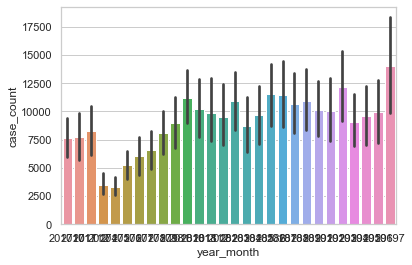

In [51]:
train_chart=train
train_chart['year_month']=train_chart['Year'].astype(str)+train_chart['Month'].astype(str)
print(train_chart.head())
print(train_chart.describe())
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='year_month', y="case_count", data=train_chart)

In [62]:
train_chart_line=train.groupby(['application_date'])['case_count'].sum().reset_index()
train_chart_line.head()

,application_date,case_count
0,2017-04-01,1196.0
1,2017-04-02,605.0
2,2017-04-03,2058.0
3,2017-04-04,2268.0
4,2017-04-05,3945.0


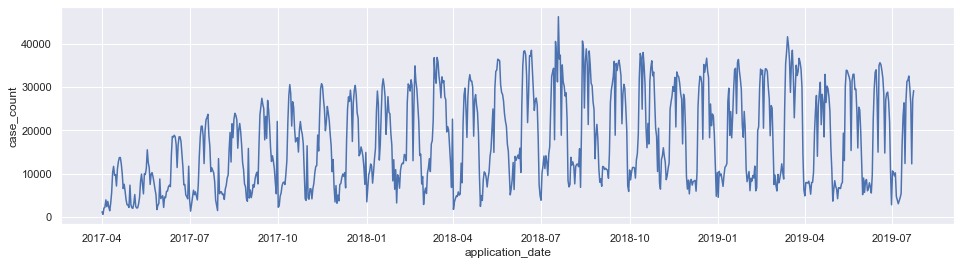

<Figure size 576x288 with 0 Axes>

In [61]:
sns.set(style='darkgrid')
sns.lineplot(x='application_date', y='case_count', data=train_chart_line)
plt.figure(figsize=(8,4))
plt.rcParams["figure.figsize"] = (50, 6)
plt.rcParams["xtick.labelsize"] = 7

In [22]:
def mape(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    error = (predict - actual)/actual
    abs_error = np.absolute(error)
    
    #square_distance = distance ** 2

    #mean_square_distance = square_distance.mean()

    score = np.mean(abs_error)

    return score

from sklearn.metrics import make_scorer
mape_score = make_scorer(mape,greater_is_better = False)

#gsSVR = GridSearchCV(...scoring=rmse_score...)
#gsSVR.fit(X_train,Y_train)
#SVR_best = gsSVR.best_estimator_
#print(gsSVR.best_score_)

In [23]:
#Alternate code for gridsearch/tuning

# A parameter grid for XGBoost
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.8],
        'max_depth': [ 5, 8],
        'learning_rate':[0.01,0.1,0.3],
        'n_estimators':[30,50,80]
        }



Xd,yd=train.drop('case_count',axis=1),train.case_count
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg = xgb.XGBRegressor(eval_metric='auc',verbose=100, nthread=4)          

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xg, param_grid=params, n_jobs=4,scoring=mape_score, cv=skf.split(Xd,yd), verbose=100 )
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_tuning_aggregated_v0.2_saved.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pick

[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    1.0s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.3s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(5

[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    3.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 168 tasks      | elapsed:    3.9s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(5

[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:    7.3s
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(9, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(1093,), dtype=int3

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [17]:
#XGBoost code,using tuned models to predict

X,y=train.drop('case_count',axis=1),train.case_count

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
xg_reg = xgb.XGBRegressor(eval_metric='mae',learning_rate = 0.1,
                max_depth = 8,colsample_bytree=0.8, subsample=0.8, n_estimators = 50,verbose=50)

err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
print('start')
xg_reg.fit(X,y)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = xg_reg.predict(test)
y_pred_tot.append(pred)

start
[16:17:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'case_count':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_Aggregated_Tuned(MAPE)_0.3_saved.csv',index=False)
s.head()

nan
[ 1138.6965    931.8651   1933.7559    682.2591   1321.1539    655.79407
   754.8552   1325.2106   1052.9128   1946.284     987.15643  1377.9465
  1066.8157    906.1069    962.5859    902.8526   1880.799     864.33386
  1289.7786   1092.866     831.2067   1007.6566    913.444    1756.135
   930.66766  3446.288    1316.8302   1045.3961   1229.7765   1800.7732
  1760.4583    630.1408   1239.464     753.59106   706.4961    503.42368
  -145.93964  1674.6746   1078.8333   1464.6957   1022.2161    986.05945
  1129.233     991.7554   1956.7249    946.37915  1362.2297    961.3962
   882.0324   1063.7526    922.2277   1806.4001    758.76636  1436.9176
  1024.3721   1604.1648   5938.464     469.6558   1880.4457   1082.8623
  1355.402     754.4165    654.7324    926.8648    739.08923  1515.1171
   726.5494   1324.94      944.9682   1253.4873   1266.0327   1077.6333
  1942.857    1157.7552   1605.3058   1157.8447   1004.9575    979.27155
   964.46893  1738.2278    930.3777   1359.5485   1021.8

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,case_count
0,1138.696533
1,931.865112
2,1933.755859
3,682.259094
4,1321.153931
